In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Loadinng insurance data to pandas dataframe
insurance_data = pd.read_csv(r"datasets\insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


##### Number of Records and Columns

In [6]:
insurance_data.shape

(1338, 7)

##### List of columns

##### List of columns

In [9]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

##### Insurance data types

In [11]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

##### Data information

In [13]:
### No missing values are present as total values = non-null values
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Checking for duplicates

In [15]:
insurance_data.duplicated().any()

True

In [16]:
insurance_data[insurance_data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [17]:
insurance_data1 = insurance_data.drop_duplicates()
insurance_data1.shape

(1337, 7)

##### Check for missing values

In [19]:
insurance_data1.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [20]:
insurance_data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### List of categorical and numeric columns

In [22]:
num_col = insurance_data1.select_dtypes(include="number").columns.to_list()
cat_col = insurance_data1.select_dtypes(exclude="number").columns.to_list()
print(f"Numerical columns in the data: {num_col}")
print(f"Categorical columns in the data: {cat_col}")

Numerical columns in the data: ['age', 'bmi', 'children', 'charges']
Categorical columns in the data: ['sex', 'smoker', 'region']


#### Statistical measure of Numeric columns

In [24]:
insurance_data1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Statistical measure of Categorical columns

In [26]:
insurance_data1.describe(exclude="number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [27]:
insurance_data1["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [28]:
insurance_data1["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [29]:
insurance_data1["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [30]:
insurance_data1["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [31]:
insurance_data1["region"].nunique()

4

### Data visualization

#### Histogram: numeric

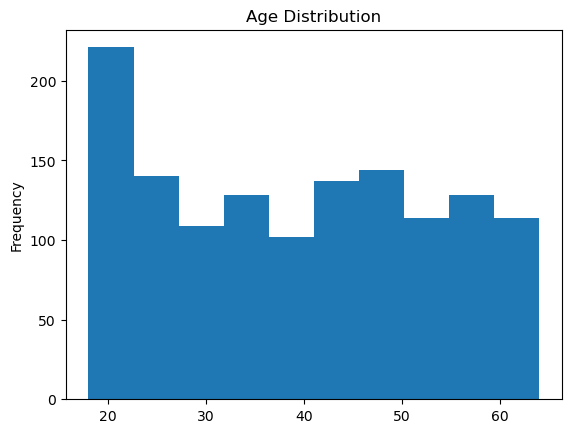

In [34]:
insurance_data1['age'].plot(kind='hist')
plt.title("Age Distribution")
plt.show()

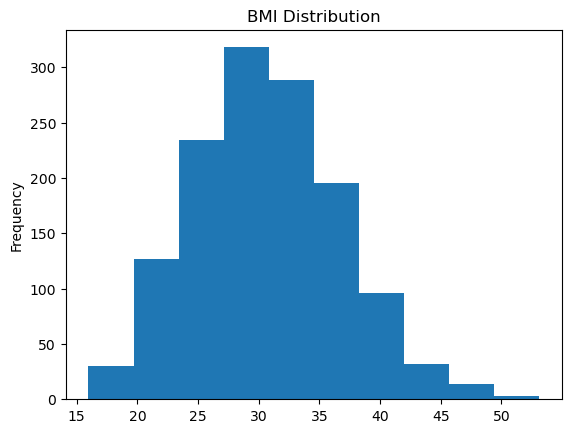

In [35]:
insurance_data1['bmi'].plot(kind='hist')
plt.title("BMI Distribution")
plt.show()

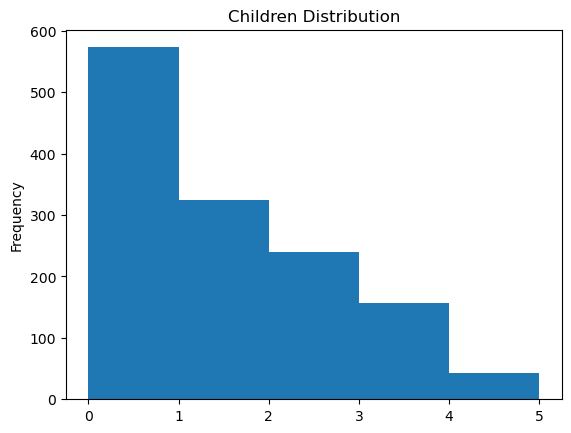

In [36]:
insurance_data1['children'].plot(kind='hist', bins=5)
plt.title("Children Distribution")
plt.show()

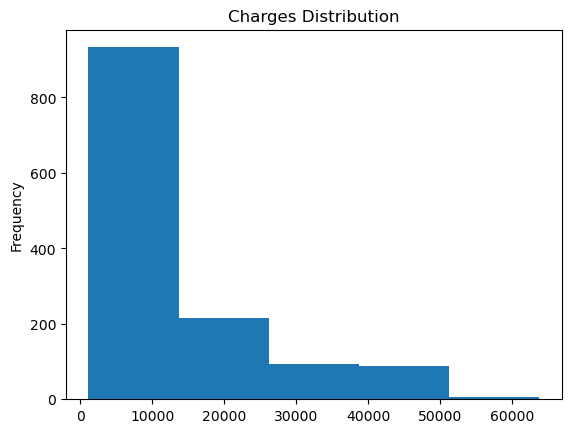

In [37]:
insurance_data1['charges'].plot(kind='hist', bins=5)
plt.title("Charges Distribution")
plt.show()

#### Bar graph: categorical

<Axes: xlabel='children'>

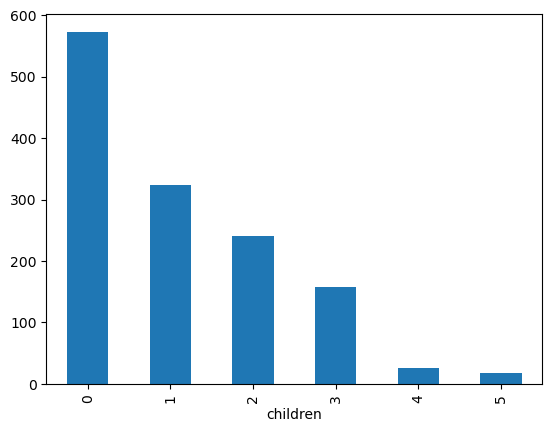

In [39]:
insurance_data1['children'].value_counts().plot(kind='bar')

<Axes: xlabel='sex'>

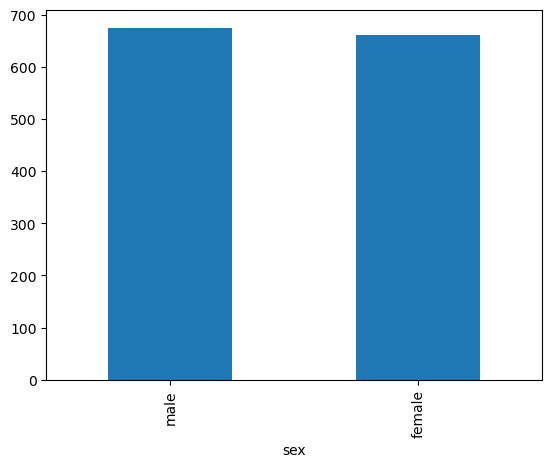

In [40]:
insurance_data1['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='region'>

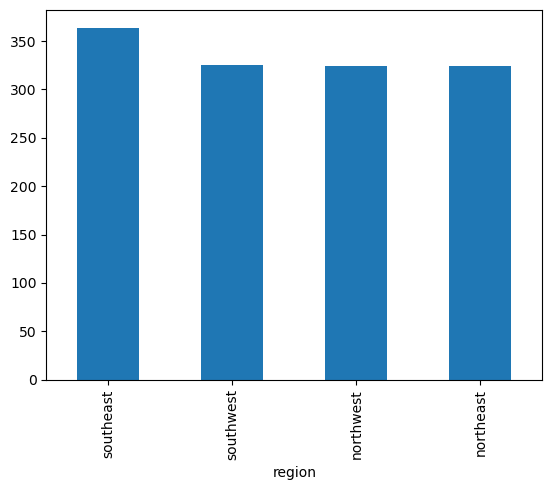

In [41]:
insurance_data1['region'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

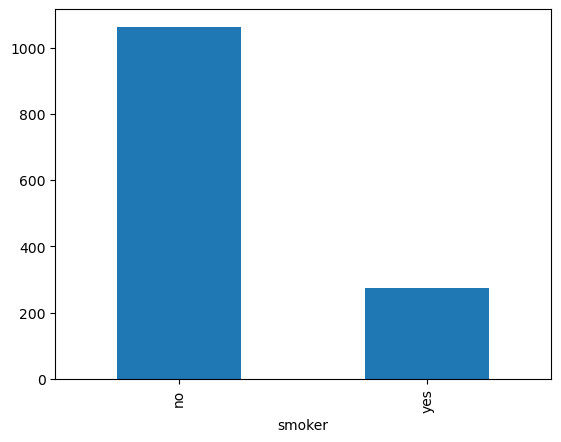

In [42]:
insurance_data1['smoker'].value_counts().plot(kind='bar')

#### Box Plot: numeric

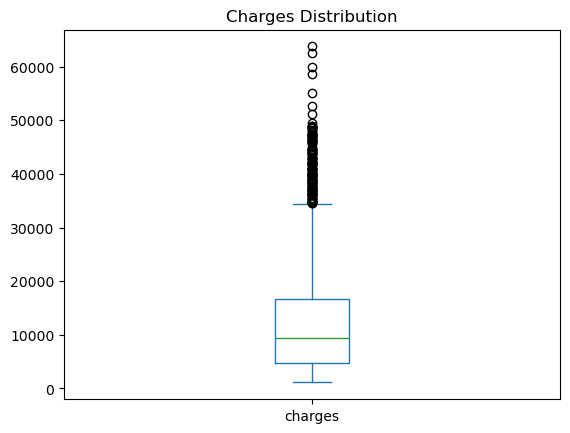

In [44]:
insurance_data1['charges'].plot(kind='box')
plt.title('Charges Distribution')
plt.show()

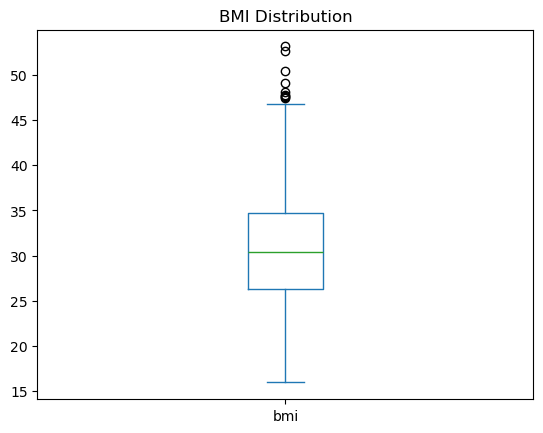

In [45]:
insurance_data1['bmi'].plot(kind='box')
plt.title('BMI Distribution')
plt.show()

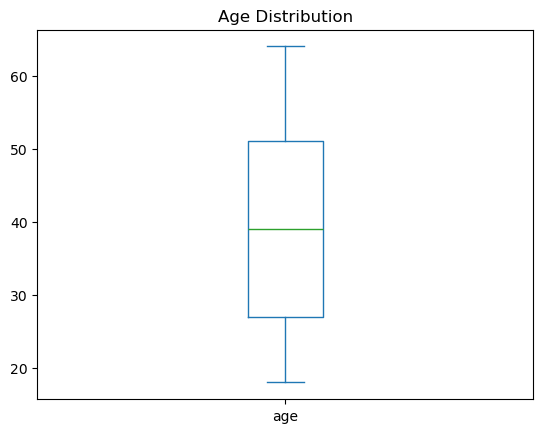

In [46]:
insurance_data1['age'].plot(kind='box')
plt.title('Age Distribution')
plt.show()

#### Pie Chart - region

In [48]:
region_count = insurance_data1['region'].value_counts()
region_count

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

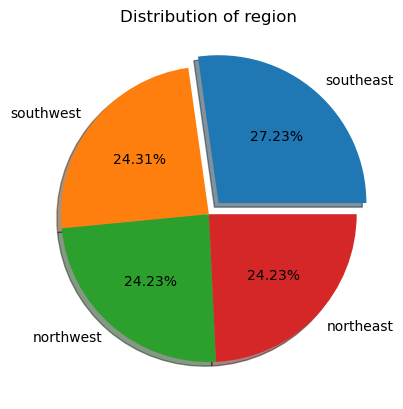

In [49]:
plt.pie(labels=region_count.index,
        x=region_count.values,
        shadow=True,
        autopct='%.2f%%',
        explode=(0.1, 0.0,0,0))
plt.title("Distribution of region")
plt.show()

#### Correlation Matrix

Text(0.5, 1.0, 'Correlation heatmap: age, bmi, charges')

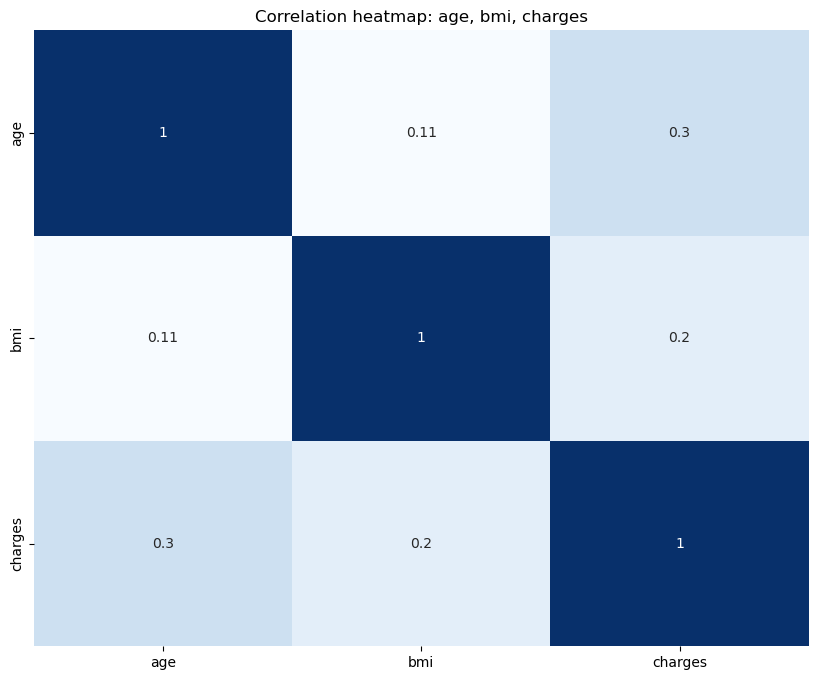

In [51]:
corr_data = insurance_data1[["age","bmi","charges"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(round(corr_data,3), annot=True, cmap="Blues", cbar=False)
plt.title("Correlation heatmap: age, bmi, charges")

#### Scatter Plot

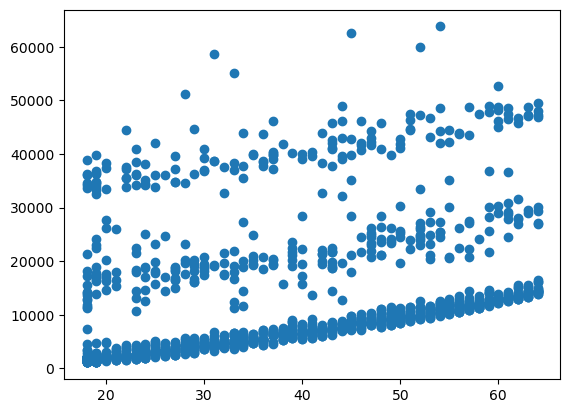

In [53]:
plt.scatter(data=insurance_data1, x='age',y='charges')

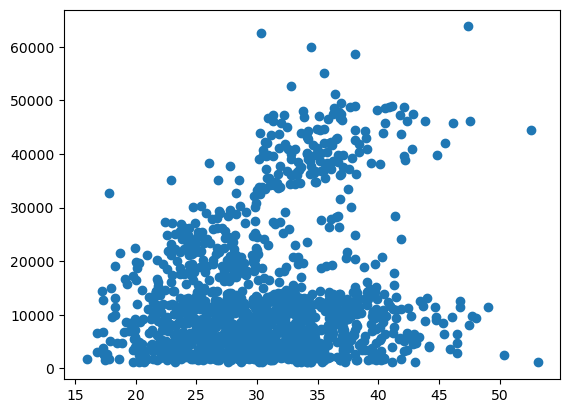

In [54]:
plt.scatter(data=insurance_data1, x='bmi',y='charges')

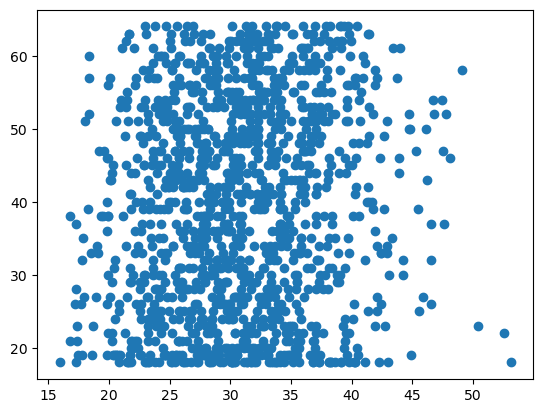

In [55]:
plt.scatter(data=insurance_data1, x='bmi',y='age')

### Insurance cost for smoker and non-smoker

In [57]:
smoker_df = insurance_data1.groupby("smoker")["charges"].mean().reset_index()
smoker_df

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


### Insurance cost for male and female

In [59]:
gender_df = insurance_data1.groupby("sex")["charges"].mean().reset_index()
gender_df

,sex,charges
0,female,12569.578844
1,male,13974.998864


<Axes: xlabel='sex'>

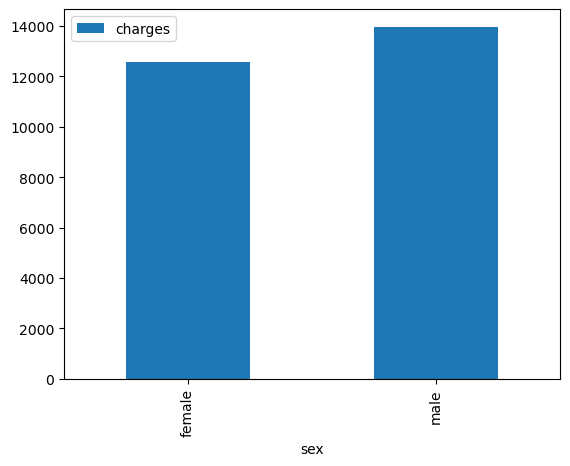

In [60]:
gender_df.plot(kind="bar",x='sex',y='charges')

### Region wise insurance cost

In [62]:
region_df = insurance_data1.groupby("region")["charges"].mean().reset_index()
region_df

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


<Axes: xlabel='region'>

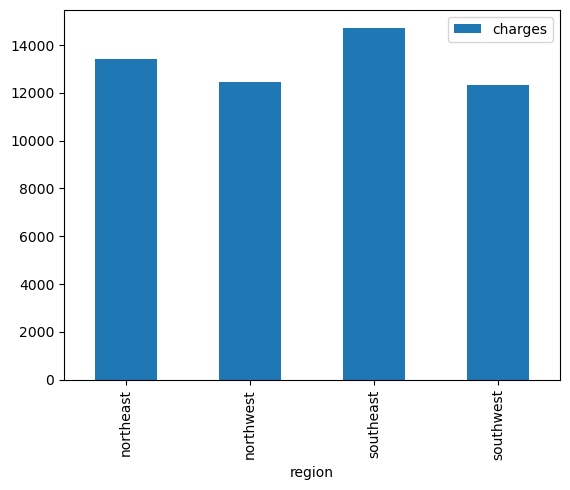

In [63]:
region_df.plot(kind="bar",x='region',y='charges')

### Region wise BMI

In [65]:
region_bmi_df = insurance_data1.groupby("region")["bmi"].mean().reset_index()
region_bmi_df

,region,bmi
0,northeast,29.173503
1,northwest,29.195494
2,southeast,33.355989
3,southwest,30.596615


<Axes: xlabel='region'>

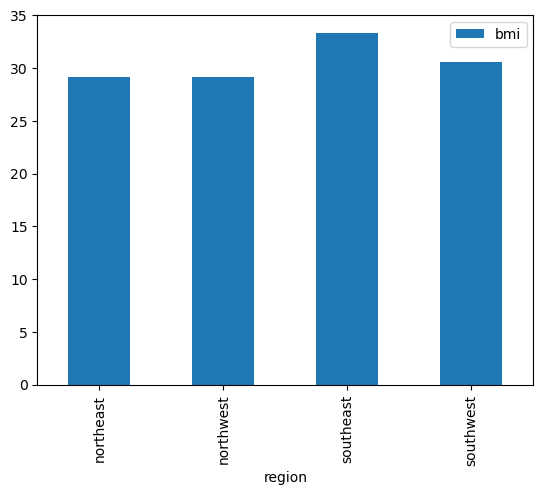

In [66]:
region_bmi_df.plot(kind="bar",x='region',y='bmi')

### Region wise Male and Female and cost

In [68]:
pd.crosstab(insurance_data1.region,insurance_data1.sex).count()

sex
female    4
male      4
dtype: int64

# Machine learning model development

In [70]:
insurance_data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
from sklearn.preprocessing import LabelEncoder

#### Converting categorical to numerical variables using encoder

In [73]:
le = LabelEncoder()

In [74]:
insurance_data1['sex']=le.fit_transform(insurance_data1['sex'])
insurance_data1['smoker']=le.fit_transform(insurance_data1['smoker'])
insurance_data1['region']=le.fit_transform(insurance_data1['region'])

In [156]:
insurance_data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [75]:
X = insurance_data1.drop(columns=["charges"],axis=1)
y = insurance_data1["charges"]

In [158]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
print(f"X train: {X_train.shape}")
print(f"X train: {y_train.shape}")

X train: (1069, 6)
X train: (1069,)


#### Feature scaling

In [165]:
insurance_data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [167]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [169]:
X['age'] = std_scaler.fit_transform(np.array(X['age']).reshape(-1,1))
X['bmi'] = std_scaler.fit_transform(np.array(X['age']).reshape(-1,1))
X['children'] = std_scaler.fit_transform(np.array(X['age']).reshape(-1,1))

In [171]:
X

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-1.440418,-1.440418,1,3
1,-1.511647,1,-1.511647,-1.511647,0,2
2,-0.799350,1,-0.799350,-0.799350,0,2
3,-0.443201,1,-0.443201,-0.443201,0,1
4,-0.514431,1,-0.514431,-0.514431,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.767704,0.767704,0,1
1334,-1.511647,0,-1.511647,-1.511647,0,0
1335,-1.511647,0,-1.511647,-1.511647,0,2
1336,-1.297958,0,-1.297958,-1.297958,0,3


## Linear Regression Model

In [174]:
from sklearn.linear_model import LinearRegression

In [176]:
lr = LinearRegression()

In [178]:
lr.fit(X_train,y_train)

LinearRegression()

#### Cross Validation

In [180]:
from sklearn.model_selection import cross_val_score, cross_validate

In [184]:
result_lr = cross_validate(lr, X, y, cv=5, return_train_score=True, scoring='r2')
result_lr

{'fit_time': array([0.00400019, 0.00200009, 0.00199986, 0.00199866, 0.00201464]),
 'score_time': array([0.00300026, 0.00200129, 0.00215411, 0.00156522, 0.00200105]),
 'test_score': array([0.73776985, 0.68939551, 0.73650854, 0.70087983, 0.727411  ]),
 'train_score': array([0.71652652, 0.72504447, 0.71678945, 0.72631486, 0.71931922])}

In [191]:
train_acc = result_lr['train_score'].mean()*100
print('Training accuracy = ',round(train_acc,2),'%')

Training accuracy =  72.08 %


In [193]:
test_acc = result_lr['test_score'].mean()*100
print('Test accuracy = ',round(test_acc,2),'%')

Test accuracy =  71.84 %


## Multiple Models

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [204]:
models = []
models.append(("Linear Regression", LinearRegression()))
models.append(("Knn Regression", KNeighborsRegressor()))
models.append(("Decision Tree Regression", DecisionTreeRegressor()))
models.append(("Random Forest Regression", RandomForestRegressor()))
for model in models:
    result = cross_validate(model[1], X, y, cv=5, return_train_score=True, scoring='r2')
    print(model[0])
    train_acc = round((result['train_score'].mean())*100, 2)
    test_acc = round((result['test_score'].mean())*100, 2)
    print(f'Train R2 score : {train_acc}')
    print(f'Test R2 score : {test_acc}')
    print('\n')

Linear Regression
Train R2 score : 72.08
Test R2 score : 71.84


Knn Regression
Train R2 score : 77.2
Test R2 score : 64.88


Decision Tree Regression
Train R2 score : 89.22
Test R2 score : 48.1


Random Forest Regression
Train R2 score : 87.16
Test R2 score : 62.81




## Random Forest Hyperparameter Tuning Using RandomSearch

In [210]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [212]:
params = {
    'n_estimators': [100, 200, 300],     ### numb of trees
    'max_depth':[None, 5, 10],           ### max numb of levels in tree
    'min_samples_split': [2,5,10],       ### min numb of samples required to split a node
    'min_samples_leaf': [1,2,4],         ### min numb of samples require at each leaf node
    'bootstrap':[True,False]             ### method of selecting samples for training each tree
}

random_search = RandomizedSearchCV(
    param_distributions=params,          ### Specify the parameter distributions to sample from
    estimator=RandomForestRegressor(),   ### estimator
    cv=5,                                ### numb of cross-valid folds
    return_train_score=True,             ### include training scores in results
    scoring='r2',                        ### scoring metric
    n_jobs=1                             ### use all cpu cores for parallel computation
)

In [214]:
random_search.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='r2')

In [216]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'bootstrap': True}

In [220]:
random_search.cv_results_

{'mean_fit_time': array([0.41853986, 0.33719254, 0.2047554 , 0.16848645, 0.39072847,
        0.3671463 , 0.13871884, 0.64535732, 0.75275893, 0.75508962]),
 'std_fit_time': array([0.00547543, 0.00281753, 0.00418192, 0.00192605, 0.00729598,
        0.00417106, 0.00067808, 0.00966578, 0.03306041, 0.00301537]),
 'mean_score_time': array([0.01671019, 0.01470518, 0.00970111, 0.00810604, 0.01503048,
        0.01600037, 0.00770497, 0.02631068, 0.02924461, 0.0266963 ]),
 'std_score_time': array([3.89583972e-04, 7.50506847e-04, 1.16521978e-03, 1.98519078e-04,
        1.75992190e-03, 9.48893964e-07, 3.98177929e-04, 3.11820179e-03,
        3.13510300e-03, 4.00356113e-04]),
 'param_n_estimators': masked_array(data=[200, 200, 100, 100, 200, 200, 100, 300, 300, 300],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_min_samples_split': masked_array(data=[2, 5, 10, 5, 10, 5, 5, 5, 2, 2],
              mask

In [226]:
random_search.cv_results_['mean_train_score'].mean() * 100

81.50839445018144

In [228]:
random_search.cv_results_['mean_test_score'].mean() * 100

64.09521695672049

In [230]:
RF = RandomForestRegressor(n_estimators=100,
                           min_samples_split=5,
                           min_samples_leaf=4,
                           max_depth=5,
                           bootstrap=True)

In [232]:
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5)

In [234]:
from sklearn.metrics import r2_score

In [238]:
predicted_train_data = RF.predict(X_train)
train_score = r2_score(y_true=y_train, y_pred=predicted_train_data)
predicted_test_data = RF.predict(X_test)
test_score = r2_score(y_true=y_test, y_pred=predicted_test_data)
print(f"R-squared (R^2) for Training data using Random Forest: {round(train_score,2)*100} %")
print(f"R-squared (R^2) for Test data using Random Forest: {round(test_score,2)*100} %")

R-squared (R^2) for Training data using Random Forest: 88.0 %
R-squared (R^2) for Test data using Random Forest: 88.0 %


### Create a scatter plot with a regression line

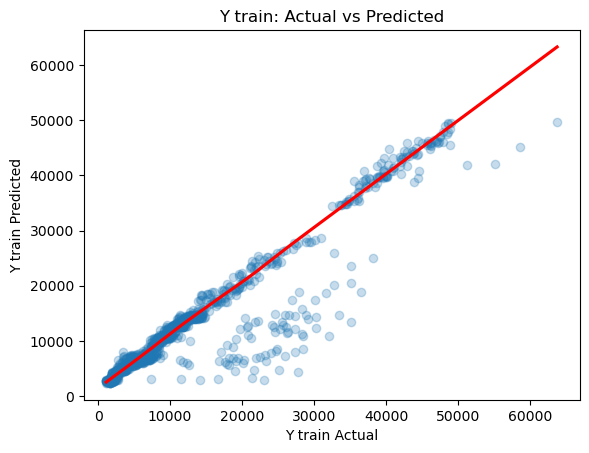

In [241]:
sns.regplot(x=y_train, y=predicted_train_data,
            lowess=True,                   ### add a locally weighted scatterplot smoothing line
            line_kws={'color':'red'},      ### color of the regression line
            scatter_kws={'alpha':0.25}     ### transparency
           )

plt.title("Y train: Actual vs Predicted")
plt.xlabel("Y train Actual")
plt.ylabel("Y train Predicted")
plt.show()

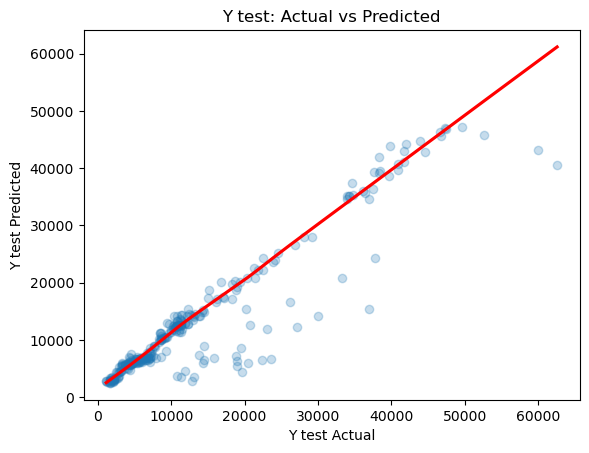

In [243]:
sns.regplot(x=y_test, y=predicted_test_data,
            lowess=True,                   ### add a locally weighted scatterplot smoothing line
            line_kws={'color':'red'},      ### color of the regression line
            scatter_kws={'alpha':0.25}     ### transparency
           )

plt.title("Y test: Actual vs Predicted")
plt.xlabel("Y test Actual")
plt.ylabel("Y test Predicted")
plt.show()

### Predicting using our model

In [248]:
X

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-1.440418,-1.440418,1,3
1,-1.511647,1,-1.511647,-1.511647,0,2
2,-0.799350,1,-0.799350,-0.799350,0,2
3,-0.443201,1,-0.443201,-0.443201,0,1
4,-0.514431,1,-0.514431,-0.514431,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.767704,0.767704,0,1
1334,-1.511647,0,-1.511647,-1.511647,0,0
1335,-1.511647,0,-1.511647,-1.511647,0,2
1336,-1.297958,0,-1.297958,-1.297958,0,3


In [254]:
age = 24
sex = 1
bmi = 35
children = 3
smoker = 1
region = 3

In [264]:
age1 = std_scaler.transform([[age]])
bmi1 = std_scaler.transform([[bmi]])
chld1 = std_scaler.transform([[children]])
print(age1, bmi1, chld1)

[[0.]] [[11.]] [[-21.]]


In [268]:
RF.predict([[age1[0][0], sex, bmi1[0][0], chld1[0][0], smoker, region]])

array([15330.96100481])